In [1]:
import os
import random
import json
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
import numpy as np
from PIL import Image, ImageDraw
from tqdm import tqdm_notebook as tqdm


# Load data

In [3]:
path = '/data/detail_price/dxf_хпц/jsoned/'
files = os.listdir(path)
len(files)

74548

In [4]:
lens = []
polygons = []

for file in tqdm(files[:2000]):
    p = path + file
    arr = json.load(open(p))
    lens.append(len(arr))
    polygons.append(arr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


# Pack

In [5]:
random.seed(2020)

In [6]:
K1 = 12
K2 = 5
N = 4
MAX_SQUARE = 10000
MIN_SQUARE = 300

is_short = lambda poly: len(poly) < K1 and len(poly) > K2
size = lambda poly: (max(np.array(poly)[:, 0]), max(np.array(poly)[:, 1]))
def is_low_square(poly):
    s = size(poly)
    sq = s[0] * s[1]
    return sq < MAX_SQUARE and sq > MIN_SQUARE
is_not_degenerate = lambda poly: len(poly) == len(set(poly))
is_selfoverlap = lambda poly: geom.segments_cross_or_overlap(geom.segments_from_points(poly))

is_good_fig = lambda poly: is_short(poly) and \
                           is_low_square(poly) and \
                           is_not_degenerate(list(map(tuple, poly))) #and \
#                            not is_selfoverlap(poly)
to_fig = lambda fig: list(map(lambda p: tuple([float(p[0]), float(p[1])]) , fig))

good_figs = list(filter(is_good_fig, polygons))
figures = [good_figs[random.randint(0, len(good_figs)-1)] for _ in range(N)]
figures = sorted(list(map(to_fig, figures)), key=lambda p: -size(p)[0] * size(p)[1])

print('lenghts:', list(map(len, figures)))
print('sizes:', list(map(size, figures)))

lenghts: [8, 7, 7, 11]
sizes: [(80.0, 74.0), (60.0, 52.0), (47.0, 55.0), (16.0, 66.0)]


In [7]:
len(figures)

4

In [3]:
from figure import Figure
from packmap import Packmap
import pack_strategies as packing

ImportError: attempted relative import with no known parent package

In [9]:
pm = Packmap(300, 300)
figs = list(map(Figure, figures))
packing.main(pm, figs, packing.pack_2_sides, logging=True)

[0/4] insert with kim 1.0
[1/4] insert with kim 0.09237777777777778
[2/4] insert with kim 0.11082777777777778
[3/4] insert with kim 0.12149444444444445



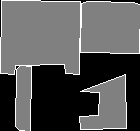

In [10]:
pm.render_packmap()

# test task

In [20]:
test_dxfs = [random.choice(files) for _ in range(4)]

In [21]:
figures = [json.load(open(path+name)) for name in test_dxfs]
list(map(len, figures))

[4, 4, 4, 28]

In [22]:
pm = Packmap(3000, 3000)
figs = list(map(Figure, figures))
packing.main(pm, figs, packing.pack_4_sides, logging=True)

[0/4] insert with kim 1.0
[1/4] insert with kim 0.018120888888888888
[2/4] insert with kim 0.020856666666666666
[3/4] insert with kim 0.021120777777777777



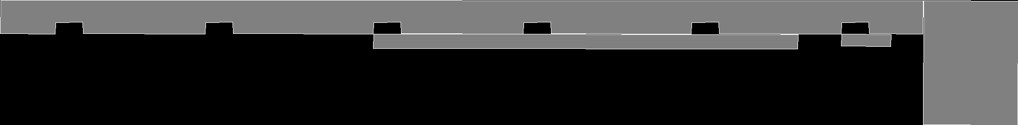

In [23]:
img = pm.render_packmap()
img.resize((img.size[0]//2, img.size[1]//2))

In [24]:
counts = [random.randint(3, 6) for _ in test_dxfs]

new_figures = []
for fig, count in zip(figures, counts):
    for c in range(count):
        new_figures.append(fig)
figures = new_figures

# flat task
size = lambda poly: max(np.array(poly)[:, 0]) * max(np.array(poly)[:, 1])
new_figures = []

In [25]:
from math import log2

def pack_4_sides_w_rect(m, p):
    best_fig = None
    best_res = -1
    maybe_to_list = lambda x: x if isinstance(x, list) else [x]
    points = p.get_points()
    
    for deg in [0, -180, 90, -90]:
        stepsize = 1 if len(p) <= 20 else int(len(p)//log2(len(p))*3)
        for j in range(0, len(p), stepsize):
            curr_p = Figure(maybe_to_list(points[j:]) + maybe_to_list(points[:j]))
            curr_p = curr_p.rotate(deg)
#             curr_p = curr_p.move(1, 0)
            fig, res = m.get_best_kim_coord(curr_p)
            if res:
                if res > best_res:
                    best_res = res
                    best_fig = fig
    return best_fig, best_res

In [26]:
m1 = Packmap(3000, 1200)
figs = list(map(Figure, figures))

packing.main(m1, figs, packing.pack_4_sides, logging=True)

print('map kim', m1.calc_packmap_kim())

[0/19] insert with kim 1.0
[1/19] insert with kim 0.06445888888888889
[2/19] insert with kim 0.09668833333333333
[3/19] insert with kim 0.12891777777777777
[4/19] insert with kim 0.16114722222222222
[5/19] insert with kim 0.19337666666666667
[6/19] insert with kim 0.20644944444444444
[7/19] insert with kim 0.21952222222222223
[8/19] insert with kim 0.232595
[9/19] insert with kim 0.2456677777777778
[10/19] insert with kim 0.25874055555555553
[11/19] insert with kim 0.27181333333333335
[12/19] insert with kim 0.2786527777777778
[13/19] insert with kim 0.2854922222222222
[14/19] insert with kim 0.29233166666666666
[15/19] insert with kim 0.2991711111111111
[16/19] insert with kim 0.2998313888888889
[17/19] insert with kim 0.30049166666666666
[18/19] insert with kim 0.30115194444444443

map kim 0.30115194444444443


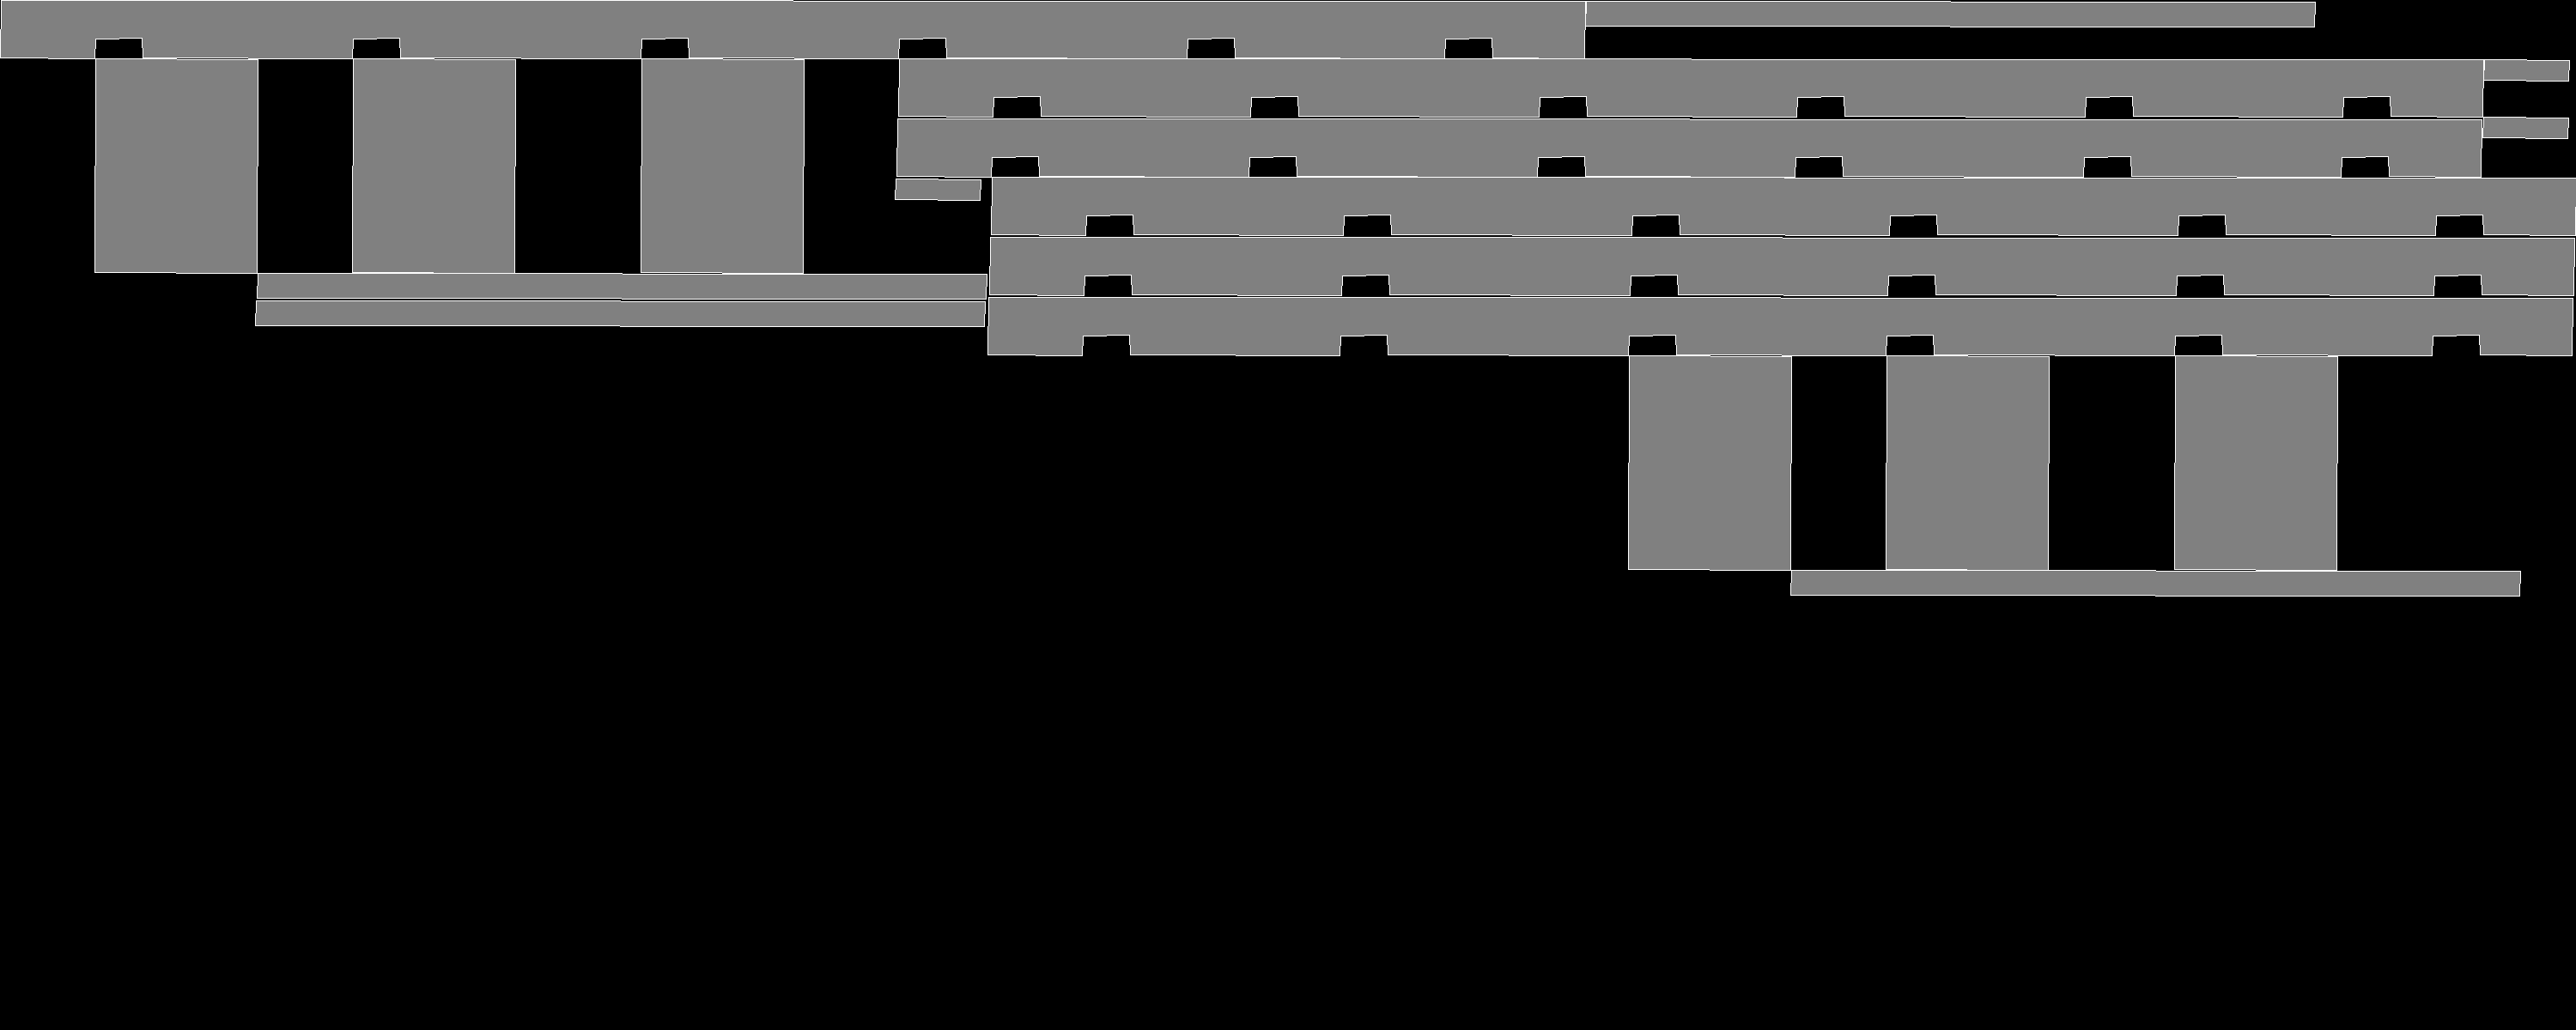

In [27]:
reports = './test_pics/'
m1.render_full_packmap()#.save(reports + 'packing_0.png')